## <center> Python Geospatial Data Analysis - Guided Project

## <center> Instructor: Vinita Silaparasetty


## <center>By Budi Saleh

#####  Importing Libraries

In [2]:
import pandas as pd
import matplotlib as mp
import folium
import math
from folium.plugins import MarkerCluster, HeatMap 
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import datetime
from plotly.subplots import make_subplots 

#### Importing dataset 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/VinitaSilaparasetty/coursera-spatial-data-analysis/master/boston-crime%202.csv')

In [4]:
df.head ()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Date,Time
0,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)",2019-10-13,09:28:24
1,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)",2019-10-12,20:11:26
2,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,NaN,2019-10-12 15:12:43,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)",2019-10-12,15:12:43
3,I192082577,724,Auto Theft,AUTO THEFT,D4,130,NaN,2019-10-12 04:41:52,2019,10,Saturday,4,Part One,SAINT JAMES AVE,42.349476,-71.076402,"(42.34947586, -71.07640150)",2019-10-12,04:41:52
4,I192079582,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,A15,47,NaN,2019-10-02 08:08:49,2019,10,Wednesday,8,Part One,N MEAD ST,42.381846,-71.066551,"(42.38184582, -71.06655134)",2019-10-02,08:08:49


####  Analyzing data set

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      472 non-null    object 
 1   OFFENSE_CODE         472 non-null    int64  
 2   OFFENSE_CODE_GROUP   472 non-null    object 
 3   OFFENSE_DESCRIPTION  472 non-null    object 
 4   DISTRICT             466 non-null    object 
 5   REPORTING_AREA       472 non-null    object 
 6   SHOOTING             0 non-null      float64
 7   OCCURRED_ON_DATE     472 non-null    object 
 8   YEAR                 472 non-null    int64  
 9   MONTH                472 non-null    int64  
 10  DAY_OF_WEEK          472 non-null    object 
 11  HOUR                 472 non-null    int64  
 12  UCR_PART             472 non-null    object 
 13  STREET               468 non-null    object 
 14  Lat                  472 non-null    float64
 15  Long                 472 non-null    flo

In [6]:
df.describe()

,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR,Lat,Long
count,472.000000,0.0,472.0,472.000000,472.000000,472.000000,472.000000
mean,2284.997881,NaN,2019.0,8.993644,13.116525,42.141077,-70.786551
std,1218.047392,NaN,0.0,0.189876,7.035034,2.817391,4.557314
min,111.000000,NaN,2019.0,7.000000,0.000000,-1.000000,-71.168951
25%,802.000000,NaN,2019.0,9.000000,9.000000,42.296239,-71.100820
50%,2907.000000,NaN,2019.0,9.000000,15.000000,42.327533,-71.077390
75%,3301.000000,NaN,2019.0,9.000000,18.000000,42.349715,-71.063450
max,3831.000000,NaN,2019.0,10.000000,23.000000,42.387935,-1.000000


#### Generate Base Map

In [7]:
boston = (42.358433, -71.05977)
m = folium.Map(location = boston, tiles ="Stamen terrain", zoom_start =12)
m

#### Mark Crime Scenes

In [9]:
mc = MarkerCluster()
for idx, row in df.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(folium.Marker([row['Lat'], row['Long']]))
m.add_child(mc)

From the map, we learn that the hot spots where crimes occurred are :

* South End
* Roxbury
* Dorchester

These are the regions where more officers should be posted so that they can respond quickly.

####  View Districts with Highest Crime Rates

In [10]:
crime = df.groupby(['DISTRICT','STREET','REPORTING_AREA','Lat','Long']).sum().reset_index()

In [11]:
crime['Lat'] = crime['Lat'].astype(float)
crime['Long'] = crime['Long'].astype(float)

In [12]:
heat_df = crime[['Lat', 'Long']]

In [13]:
heat_data = [[row['Lat'],row['Long']] for index, row in heat_df.iterrows()]

In [14]:
m2 = folium.Map(location = boston, tiles ='stamentoner', zoom_start =12)
HeatMap(heat_data, radius = 15).add_to(m2)
mc = MarkerCluster()
for idx, row in df.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(folium.Marker([row['Lat'], row['Long']]))
m2.add_child(mc)

m2

#### Medical Assistance Analysis

In [15]:
med =df.loc[df.OFFENSE_CODE_GROUP == 'Medical Assistance'][['Lat','Long']]

In [16]:
med

,Lat,Long
23,42.355942,-71.062583
53,42.307342,-71.105441
58,42.309692,-71.072859
73,42.341288,-71.054679
75,42.320778,-71.105538
83,42.319757,-71.054289
95,42.276131,-71.087654
103,42.319052,-71.084114
108,42.285398,-71.156161
117,42.343734,-71.074192


In [17]:
heat_df = med[['Lat', 'Long']]

In [18]:
heat_data_med = [[row['Lat'],row['Long']] for index, row in heat_df.iterrows()]

In [19]:
m6 = folium.Map(location = boston, tiles ='openstreetmap', zoom_start =12)
HeatMap(heat_data_med, radius = 15).add_to(m6)
m6

From the map, we learn that the crimes where medical assistance was required occurred at :

* Dorchester Avenue
* Cambridge Street
* Commercial Street
* Tremont Street
* Washington Street
* B Street
* Higher Street
* Storrow Drive
* Westland Aveneue
* Harrison Avenue
* S. Boston Bypass Road
* Seaport Boulevard
* Townsend Street
* Columbia Road
* Geneva Avenue
* Adams Street

These are the regions where the police should be more vigilant and provisions should be made for ambulances to reach quicker. 

#### Crimes Commited

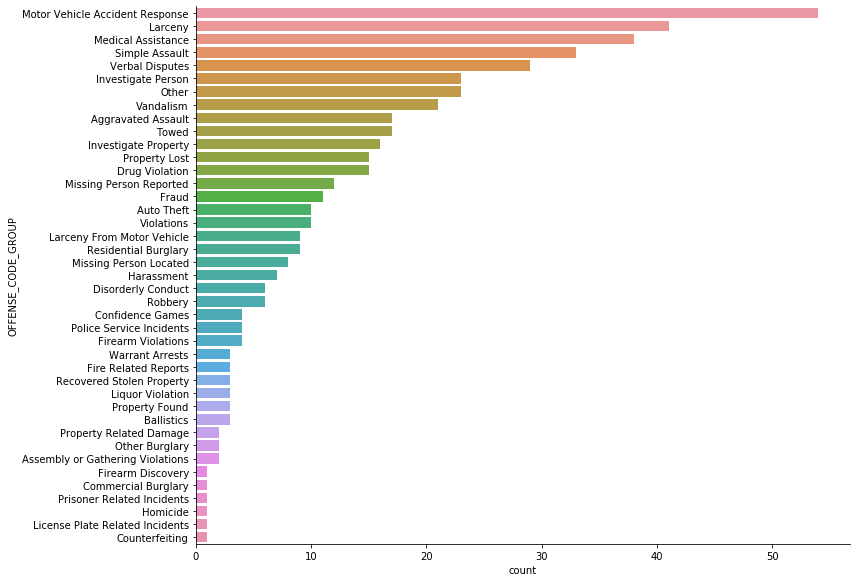

In [20]:
sns.catplot(y='OFFENSE_CODE_GROUP',
           kind='count',
           height =8,
           aspect =1.5,
           order =df.OFFENSE_CODE_GROUP.value_counts().index,
           data=df)


#### Motor Vehicle Accident Response

In [21]:
mv = df.loc[df.OFFENSE_CODE_GROUP =='Motor Vehicle Accident Response'][['Lat','Long']]
mv.fillna(0, inplace = True)
mv.Lat.fillna(0, inplace = True)
mv.Long.fillna(0, inplace = True)
heat_df_mv = mv[['Lat', 'Long']]
heat_data_mv = [[row['Lat'],row['Long']] for index, row in heat_df_mv.iterrows()]

In [22]:
m4 = folium.Map(location = boston, tiles ='openstreetmap', zoom_start =12)
HeatMap(heat_data_mv, radius = 15).add_to(m4)
m4

If we study Medford Street, we find that it is close to Barry Playground. This means that some of the road accidents may have been caused due to parents who were possibly distracted by their children and could not focus on driving.There is a vine shop at the intersection of Moulton Street and Vine Street. It is possible that some of the accidents were DUI. 
The accident also hapens in the intersection so there are chances of accident while driving

#### Larceny

In [23]:
lar = df.loc[df.OFFENSE_CODE_GROUP =='Larceny'][['Lat','Long']]
lar.fillna(0, inplace = True)
lar.Lat.fillna(0, inplace = True)
lar.Long.fillna(0, inplace = True)
heat_df_lar = lar[['Lat', 'Long']]
heat_data_lar = [[row['Lat'],row['Long']] for index, row in heat_df_lar.iterrows()]

In [24]:
m5 = folium.Map(location = boston, tiles ='openstreetmap', zoom_start =12)
HeatMap(heat_data_lar, radius = 15).add_to(m5)
m5

If we study Faneuil Hall Square, we see that is is a commercial area with plenty of shops, markets, fast food restaurants etc. It is understandable why it is a hot spot for larceny.